In [7]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns", None) ## show all columns

In [2]:
from google.colab import drive
drive.mount('/drive')
df = pd.read_csv('/drive/MyDrive/Colab Notebooks/US_Accidents/Final_Data.csv')
df.head()

Mounted at /drive


,Severity,Distance(mi),State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),...,Traffic_Calming,Traffic_Signal,Civil_Twilight,Date,Time,Year,Month,Hours,Week,State_Name
0,3,3.230,OH,42.1,36.1,58.0,29.76,10.0,10.4,0.00,...,False,False,Night,2016-02-08,00:37:08,2016,2,0.616667,Monday,Ohio
1,3,0.500,OH,37.0,29.8,93.0,29.69,10.0,10.4,0.01,...,False,False,Day,2016-02-08,07:53:43,2016,2,7.883333,Monday,Ohio
2,2,1.427,OH,35.6,29.2,100.0,29.66,10.0,8.1,0.00,...,False,True,Day,2016-02-08,08:16:57,2016,2,8.266667,Monday,Ohio
3,2,0.521,OH,33.1,30.0,92.0,29.63,0.5,3.5,0.08,...,False,False,Day,2016-02-08,11:51:46,2016,2,11.850000,Monday,Ohio
4,2,0.491,OH,39.0,31.8,70.0,29.59,10.0,11.5,0.00,...,False,False,Day,2016-02-08,14:19:57,2016,2,14.316667,Monday,Ohio


In [3]:
df = df.query('Year==2020')   # Selecting data for year 2020

In [ ]:
df.columns

Index(['Severity', 'Distance(mi)', 'State', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Date',
       'Time', 'Year', 'Month', 'Hours', 'Week', 'State_Name'],
      dtype='object')

In [4]:
df = df.drop(columns=['Date', 'Time', 'Month', 'Hours', 'Week','Year','State_Name','State'])    # Dropping unnecessary columns

In [5]:
df.groupby('Severity').size()

Severity
1     24701
2    494344
3     40406
4     20869
dtype: int64

**DownSampling for balancing all classes**

In [6]:
df = df.sample(frac=0.17).reset_index(drop=True)   # Shuffling the dataframe

In [8]:
df.groupby('Severity').size()

Severity
1     4164
2    83998
3     6948
4     3544
dtype: int64

**OneHot Encoding of Columns**

In [9]:
for col in ['Weather_Condition']:
    df = pd.merge(left=df,
                right=pd.get_dummies(df[col]),
                left_index=True,
                right_index=True
    )
    df = df.drop(columns = [col])

df

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Blowing Dust,Blowing Dust / Windy,Blowing Snow,Blowing Snow / Windy,Cloudy,Cloudy / Windy,Drizzle,Drizzle / Windy,Drizzle and Fog,Fair,Fair / Windy,Fog,Fog / Windy,Haze,Haze / Windy,Heavy Drizzle,Heavy Rain,Heavy Rain / Windy,Heavy Snow,Heavy Snow / Windy,Heavy T-Storm,Heavy T-Storm / Windy,Light Drizzle,Light Drizzle / Windy,Light Freezing Drizzle,Light Freezing Rain,Light Freezing Rain / Windy,Light Rain,Light Rain / Windy,Light Rain Shower,Light Rain Shower / Windy,Light Rain with Thunder,Light Sleet / Windy,Light Snow,Light Snow / Windy,Light Snow and Sleet / Windy,Mist,Mostly Cloudy,Mostly Cloudy / Windy,N/A Precipitation,Partial Fog,Partly Cloudy,Partly Cloudy / Windy,Patches of Fog,Patches of Fog / Windy,Rain,Rain / Windy,Rain Shower,Shallow Fog,Showers in the Vicinity,Sleet,Smoke,Smoke / Windy,Snow,Snow / Windy,Snow and Sleet,Squalls / Windy,T-Storm,T-Storm / Windy,Thunder,Thunder / Windy,Thunder / Wintry Mix / Windy,Thunder in the Vicinity,Widespread Dust,Wintry Mix,Wintry Mix / Windy
0,2,0.927,55.0,55.0,41.0,29.57,10.00,5.0,0.00,False,False,False,False,True,False,False,False,False,False,False,False,Night,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0.094,48.0,45.0,83.0,30.00,6.00,7.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,Night,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0.321,32.0,18.0,85.0,29.98,0.75,29.0,0.04,False,False,False,False,False,False,False,False,False,False,False,False,Night,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0.024,64.0,64.0,80.0,29.88,6.00,0.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,Night,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0.430,45.0,42.0,65.0,30.05,10.00,6.0,0.00,False,False,False,False,True,False,False,False,False,False,False,False,Day,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98649,2,0.000,72.0,72.0,78.0,29.22,10.00,7.0,0.00,False,False,False,False,False,False,False,False,False,False,False,True,Day,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98650,2,1.716,49.0,44.0,71.0,30.08,10.00,13.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,Night,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98651,2,0.000,88.0,88.0,35.0,29.90,10.00,3.0,0.00,False,False,True,False,False,False,False,False,False,False,False,True,Day,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98652,2,0.000,84.0,84.0,56.0,28.94,8.00,9.0,0.00,False,False,True,False,False,False,False,False,False,False,False,True,Day,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Converting Bool Columns to int (0 for False and 1 for True)**

In [10]:
col_bool = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']
for i in col_bool:
  df[i] = df[i].astype(int)

df = df.replace({'Civil_Twilight':{'Day':1,'Night':0}})     # Replacing Day with 1 and Night with 0
df

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Blowing Dust,Blowing Dust / Windy,Blowing Snow,Blowing Snow / Windy,Cloudy,Cloudy / Windy,Drizzle,Drizzle / Windy,Drizzle and Fog,Fair,Fair / Windy,Fog,Fog / Windy,Haze,Haze / Windy,Heavy Drizzle,Heavy Rain,Heavy Rain / Windy,Heavy Snow,Heavy Snow / Windy,Heavy T-Storm,Heavy T-Storm / Windy,Light Drizzle,Light Drizzle / Windy,Light Freezing Drizzle,Light Freezing Rain,Light Freezing Rain / Windy,Light Rain,Light Rain / Windy,Light Rain Shower,Light Rain Shower / Windy,Light Rain with Thunder,Light Sleet / Windy,Light Snow,Light Snow / Windy,Light Snow and Sleet / Windy,Mist,Mostly Cloudy,Mostly Cloudy / Windy,N/A Precipitation,Partial Fog,Partly Cloudy,Partly Cloudy / Windy,Patches of Fog,Patches of Fog / Windy,Rain,Rain / Windy,Rain Shower,Shallow Fog,Showers in the Vicinity,Sleet,Smoke,Smoke / Windy,Snow,Snow / Windy,Snow and Sleet,Squalls / Windy,T-Storm,T-Storm / Windy,Thunder,Thunder / Windy,Thunder / Wintry Mix / Windy,Thunder in the Vicinity,Widespread Dust,Wintry Mix,Wintry Mix / Windy
0,2,0.927,55.0,55.0,41.0,29.57,10.00,5.0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0.094,48.0,45.0,83.0,30.00,6.00,7.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0.321,32.0,18.0,85.0,29.98,0.75,29.0,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0.024,64.0,64.0,80.0,29.88,6.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0.430,45.0,42.0,65.0,30.05,10.00,6.0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98649,2,0.000,72.0,72.0,78.0,29.22,10.00,7.0,0.00,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98650,2,1.716,49.0,44.0,71.0,30.08,10.00,13.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98651,2,0.000,88.0,88.0,35.0,29.90,10.00,3.0,0.00,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98652,2,0.000,84.0,84.0,56.0,28.94,8.00,9.0,0.00,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Standardizing the Data**

In [11]:
scaler = StandardScaler()
col_transform = ['Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)','Precipitation(in)']
X = scaler.fit_transform(df[col_transform])
df[col_transform] = X
df

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Blowing Dust,Blowing Dust / Windy,Blowing Snow,Blowing Snow / Windy,Cloudy,Cloudy / Windy,Drizzle,Drizzle / Windy,Drizzle and Fog,Fair,Fair / Windy,Fog,Fog / Windy,Haze,Haze / Windy,Heavy Drizzle,Heavy Rain,Heavy Rain / Windy,Heavy Snow,Heavy Snow / Windy,Heavy T-Storm,Heavy T-Storm / Windy,Light Drizzle,Light Drizzle / Windy,Light Freezing Drizzle,Light Freezing Rain,Light Freezing Rain / Windy,Light Rain,Light Rain / Windy,Light Rain Shower,Light Rain Shower / Windy,Light Rain with Thunder,Light Sleet / Windy,Light Snow,Light Snow / Windy,Light Snow and Sleet / Windy,Mist,Mostly Cloudy,Mostly Cloudy / Windy,N/A Precipitation,Partial Fog,Partly Cloudy,Partly Cloudy / Windy,Patches of Fog,Patches of Fog / Windy,Rain,Rain / Windy,Rain Shower,Shallow Fog,Showers in the Vicinity,Sleet,Smoke,Smoke / Windy,Snow,Snow / Windy,Snow and Sleet,Squalls / Windy,T-Storm,T-Storm / Windy,Thunder,Thunder / Windy,Thunder / Wintry Mix / Windy,Thunder in the Vicinity,Widespread Dust,Wintry Mix,Wintry Mix / Windy
0,2,0.240135,-0.216269,-0.132955,-1.031986,0.197690,0.356448,-0.377113,-0.148363,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,-0.274548,-0.618709,-0.650437,0.764395,0.596040,-1.180788,-0.017474,-0.148363,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,-0.134292,-1.538573,-2.047639,0.849936,0.577512,-3.198411,3.938551,1.116989,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,-0.317799,0.301155,0.332779,0.636082,0.484872,-1.180788,-1.276210,-0.148363,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,-0.066945,-0.791184,-0.805682,-0.005483,0.642359,0.356448,-0.197294,-0.148363,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98649,2,-0.332628,0.761086,0.746764,0.550540,-0.126548,0.356448,-0.017474,-0.148363,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98650,2,0.727631,-0.561218,-0.702186,0.251143,0.670151,0.356448,1.061442,-0.148363,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98651,2,-0.332628,1.680950,1.574736,-1.288612,0.503400,0.356448,-0.736752,-0.148363,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98652,2,-0.332628,1.450984,1.367743,-0.390422,-0.385938,-0.412170,0.342164,-0.148363,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
X = df.drop(columns=['Severity']).values    # Features
y = df['Severity'].values                   # Labels

**Dimensionality Reduction using PCA**

Since we have 80+ features, using all of them can be time inefficient. Furthermore, the curve of dimentionality tends to overfit the data. Hence, we need to get rid of those features that are not contributing much to the data. This can be done using PCA (Principal Component Analysis).

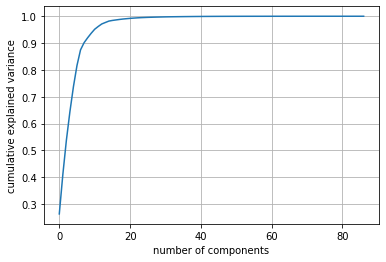

In [13]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid();

We can see from the above plot that almost 100% of the data variance is explained by 60 features. Hence we select 25 features out of total.

In [14]:
pca = PCA(n_components=25)  # Selecting 25 features out of 80+
x_pca = pca.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.20, random_state=42)  # Train-Test Split

print((X_train.shape, y_train.shape))
print((X_test.shape, y_test.shape))

((78923, 25), (78923,))
((19731, 25), (19731,))


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

# **RANDOM FOREST CLASSIFIER**

In [17]:
model = RandomForestClassifier()    # Classifier

# Hyperparameters to Tune
parameter_space = {
    'n_estimators': [10,50,100],
    'criterion': ['gini', 'entropy'],
    'max_depth': np.linspace(10,100,19)
}

# Hyperparameter Tunning
clf = RandomizedSearchCV(model, parameter_space, n_iter = 15, cv = 3, scoring = "accuracy", verbose = True) # model
clf.fit(X_train,y_train)
print(f'Best Parameters: {clf.best_params_}')

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Parameters: {'n_estimators': 100, 'max_depth': 40.0, 'criterion': 'entropy'}


In [18]:
def plot_confusion_matrix(conf_mat):        # Function for Plotting the confusion matrix
    classes = [1,2,3,4] 
    df_cm = pd.DataFrame(conf_mat,classes,classes)
    data = df_cm.values.astype(str)
    plt.figure(figsize=(8,7))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=data, fmt = '', annot_kws={"size": 16})
    plt.show()

def report(x,y,text):                        # Function for priniting the classification report
    print(f'***Printing Report for {text} data***\n')
    acc = accuracy_score(x,y)
    cr = classification_report(x,y,zero_division=0)

    print("Accuracy: ", acc)
    print("\nClassification Report:\n", cr)
    
    cm = confusion_matrix(x,y,labels=[1,2,3,4])
    plot_confusion_matrix(cm)

def makePredictions(X_train,X_test,clf):       # Function for making predictions for Train and Test Data 
    pred_train = clf.predict(X_train) 
    pred_test = clf.predict(X_test)
    return pred_train, pred_test

In [19]:
pred_train, pred_test = makePredictions(X_train,X_test,clf)

***Printing Report for Train data***

Accuracy:  0.9974405433143697

Classification Report:
               precision    recall  f1-score   support

           1       0.99      0.98      0.99      3295
           2       1.00      1.00      1.00     67205
           3       0.99      0.99      0.99      5593
           4       1.00      0.98      0.99      2830

    accuracy                           1.00     78923
   macro avg       1.00      0.99      0.99     78923
weighted avg       1.00      1.00      1.00     78923



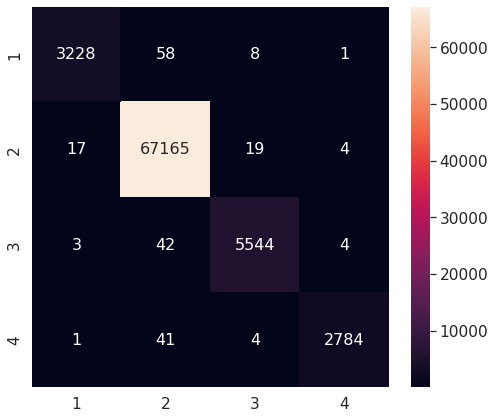

In [20]:
report(y_train,pred_train,'Train')

***Printing Report for Test data***

Accuracy:  0.8573817850083625

Classification Report:
               precision    recall  f1-score   support

           1       0.72      0.20      0.31       869
           2       0.87      0.99      0.92     16793
           3       0.47      0.09      0.15      1355
           4       0.45      0.04      0.07       714

    accuracy                           0.86     19731
   macro avg       0.63      0.33      0.36     19731
weighted avg       0.82      0.86      0.81     19731



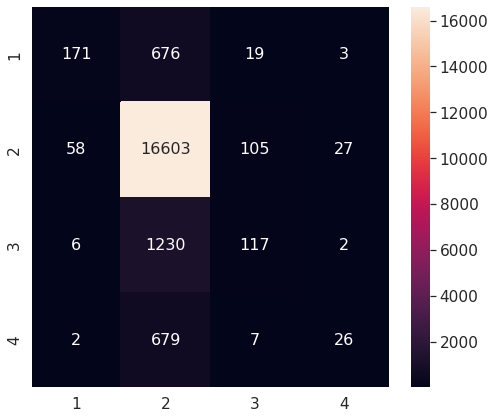

In [21]:
report(y_test,pred_test,'Test')

We can see that the classifier has given accuracy of almost 100% on train data while the test accuracy is 87%. Train accuracy is way more than the test accuracy, although both are in good range. It can be due to the fact that even after cross-validation, our classifier is overfitting to the train data. Furthermore, as our data is imbalanced, accuracy is not enough to judge a classifier. We use f1-score, where an ideal classifier has f1-score of 1. We can see that for train data, f1-score for for all the classes is 1. But for test data, it is very good for class 2 (majority class), while it drops to around 0.45 for class 1 and 3. While, it decreases significantly for class 4 (the minority class). It means that our classifier is good for predicting class 2, while it is somewhat acceptable for 1 and 3. But it is not good for class 4, where it predicted only 35 out of 667 samples correctly. But overall it is a good classifier.

# **K NEAREST NEIGHBOURS**

Hyperparameter Tunning

In [ ]:
model = KNeighborsClassifier()    # Classifier

# Hyperparameters to Tune
parameter_space = {
    'n_neighbors': np.arange(1,21)
}

# Hyperparameter Tunning
clf = RandomizedSearchCV(model, parameter_space, n_iter = 20, cv = 3, scoring = "accuracy", verbose = True) # model
clf.fit(X_train,y_train)
print(f'Best Parameters: {clf.best_params_}')

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_neighbors': 20}


In [ ]:
pred_train, pred_test = makePredictions(X_train,X_test,clf)

***Printing Report for Train data***

Accuracy:  0.8612445041369436

Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.21      0.33      3412
           2       0.86      1.00      0.93     67256
           3       0.58      0.04      0.07      5435
           4       0.74      0.01      0.03      2820

    accuracy                           0.86     78923
   macro avg       0.75      0.31      0.34     78923
weighted avg       0.84      0.86      0.81     78923



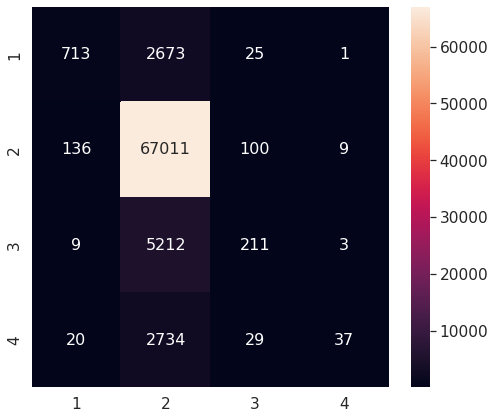

In [ ]:
report(y_train,pred_train,'Train')

***Printing Report for Test data***

Accuracy:  0.8577365566874462

Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.20      0.31       853
           2       0.86      1.00      0.92     16800
           3       0.52      0.02      0.04      1363
           4       0.28      0.01      0.01       715

    accuracy                           0.86     19731
   macro avg       0.60      0.31      0.32     19731
weighted avg       0.81      0.86      0.80     19731



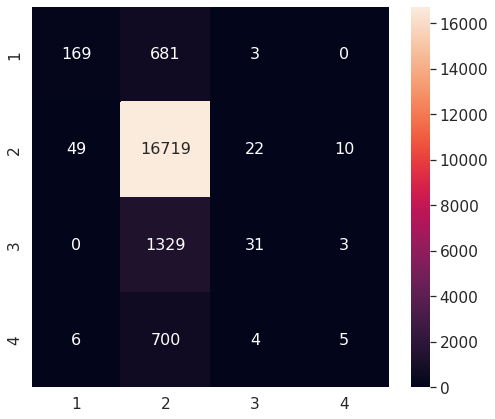

In [ ]:
report(y_test,pred_test,'Test')

We can see that the classifier has given accuracy of almost 85% on both train and test data. Hence, our classifier is not overfitting to the train data. In this case, f1-score for class 2 is good. While it decreases for class 1 to 0.4 and for class 3 to 0.34. While for class 4, it is 0.01 for test data. Hence, our classifier is a bad predictor for class 4 for both train and test data.

# **NEURAL NETWORK**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
def create_model(activation = 'relu', optimizer = 'adam', learning_rate = 0.001):
    model = Sequential()
    model.add(Dense(32, input_dim = X_train.shape[1], activation = activation))
    model.add(Dropout(0.2))
    model.add(Dense(16, input_dim = X_train.shape[1], activation = activation))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation = activation))
    model.add(Dense(4, activation = 'sigmoid'))
    
    if optimizer == 'adam':
        opt = Adam(learning_rate = learning_rate)
    else:
        opt = SGD(learning_rate = learning_rate)
    
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    
    return model

In [ ]:
%time
model = KerasClassifier(build_fn = create_model, epochs=100, batch_size=32, verbose=0)       # Initializing Classifier

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.78 µs


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [ ]:
%time
parameter_space = {
    'activation': ['sigmoid', 'relu'],
    'optimizer': ['sgd', 'adam'],
    'learning_rate': np.logspace(-3,-1,10),
}

keras_clf = RandomizedSearchCV(model, parameter_space, n_iter = 10, cv = 3, scoring = "accuracy", verbose = True)
keras_clf.fit(X_train, y_train)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.5 µs
Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fde98893e50>,
                   param_distributions={'activation': ['sigmoid', 'relu'],
                                        'learning_rate': array([0.001     , 0.0016681 , 0.00278256, 0.00464159, 0.00774264,
       0.0129155 , 0.02154435, 0.03593814, 0.05994843, 0.1       ]),
                                        'optimizer': ['sgd', 'adam']},
                   scoring='accuracy', verbose=True)

In [ ]:
keras_clf.best_params_   # Printing best parameters obtained from Randomsearchcv

{'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'adam'}

In [ ]:
pred_train, pred_test = makePredictions(X_train,X_test,keras_clf)

***Printing Report for Train data***

Accuracy:  0.8611304689380789

Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.23      0.36      3412
           2       0.86      1.00      0.92     67256
           3       0.73      0.00      0.01      5435
           4       0.89      0.00      0.01      2820

    accuracy                           0.86     78923
   macro avg       0.84      0.31      0.32     78923
weighted avg       0.85      0.86      0.80     78923



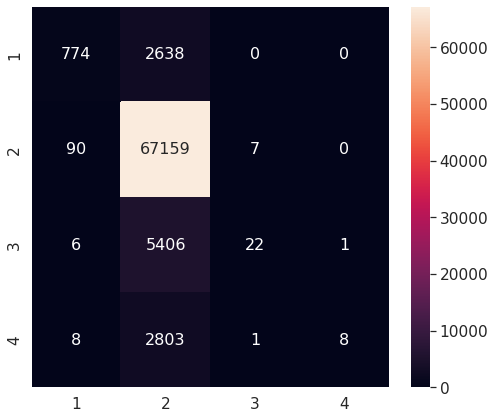

In [ ]:
report(y_train,pred_train,'Train')

***Printing Report for Test data***

Accuracy:  0.8590035983984593

Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.21      0.34       853
           2       0.86      1.00      0.92     16800
           3       0.83      0.00      0.01      1363
           4       0.14      0.00      0.00       715

    accuracy                           0.86     19731
   macro avg       0.66      0.30      0.32     19731
weighted avg       0.83      0.86      0.80     19731



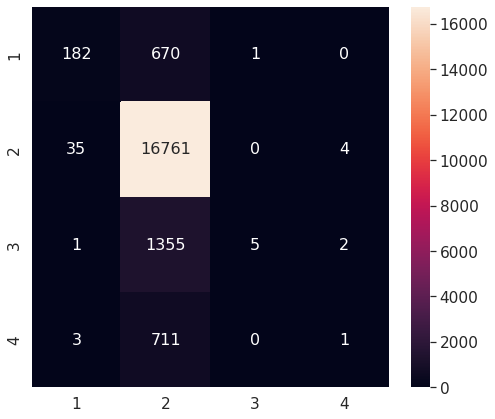

In [ ]:
report(y_test,pred_test,'Test')

The accuracy and f1-score are almost same as of the previous model. Hence, we can conclude that random forest is best for this data as it is giving good accuracy and a better f1-score.